# Challenge 1. Classification Machine Learning Model.

## 1. Data Handling & Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
CSVMetaData = '../datasets/ACDC_radiomics.csv'
data=pd.read_csv(CSVMetaData)

### ACDC Dataset Description  

The **Automated Cardiac Diagnosis Challenge (ACDC) dataset** consists of **642 radiomic features** extracted from **cardiac magnetic resonance (CMR) images** of **100 patients**. These patients are evenly distributed across **five diagnostic classes**:  

1. **Normal cases (NORM)**  
2. **Myocardial infarction with heart failure (MINF)**  
3. **Dilated cardiomyopathy (DCM)**  
4. **Hypertrophic cardiomyopathy (HCM)**  
5. **Abnormal right ventricle (RV)**  

This dataset is designed for machine learning applications in **cardiac disease classification**. It enables the development of predictive models based on **radiomic feature extraction and classification techniques**.  

### Basic Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 645 entries, original_shape_Elongation_LV_ED to class
dtypes: float64(601), int64(43), object(1)
memory usage: 504.0+ KB


### Check for Missing Values

In [5]:
data.isnull().sum().sum() # For sum all values

0

### Statistical Summary

#### Basic Statistics

In [6]:
data.describe()

,original_shape_Elongation_LV_ED,original_shape_Flatness_LV_ED,original_shape_LeastAxisLength_LV_ED,original_shape_MajorAxisLength_LV_ED,original_shape_Maximum2DDiameterColumn_LV_ED,original_shape_Maximum2DDiameterRow_LV_ED,original_shape_Maximum2DDiameterSlice_LV_ED,original_shape_Maximum3DDiameter_LV_ED,original_shape_MeshVolume_LV_ED,original_shape_MinorAxisLength_LV_ED,...,original_glszm_ZoneEntropy_MYO_ES,original_glszm_ZonePercentage_MYO_ES,original_glszm_ZoneVariance_MYO_ES,original_ngtdm_Busyness_MYO_ES,original_ngtdm_Coarseness_MYO_ES,original_ngtdm_Complexity_MYO_ES,original_ngtdm_Contrast_MYO_ES,original_ngtdm_Strength_MYO_ES,height,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.559329,0.116327,7.027303,61.907922,48.331549,67.959597,62.818826,69.083915,7830.536250,34.273933,...,4.278958,0.030509,2.157801e+05,43.418370,0.001517,22.200001,0.012399,0.055277,170.840000,74.960000
std,0.086312,0.044954,2.421983,11.241951,11.736217,12.777552,14.225637,12.871657,4335.369673,6.211781,...,0.657176,0.030895,4.108047e+05,35.480593,0.000714,61.319519,0.009736,0.081740,9.710683,16.632037
min,0.374291,0.046936,3.365035,41.204891,21.095023,46.043458,30.066593,47.053161,1984.375000,21.095961,...,3.193796,0.003233,3.176649e+02,1.770204,0.000443,0.562589,0.001240,0.003402,140.000000,35.000000
25%,0.496768,0.090354,5.547015,55.335903,41.403462,60.588288,54.071708,61.554810,5201.843750,30.218074,...,3.814769,0.014291,5.873236e+04,19.791961,0.001002,2.485099,0.007079,0.012007,165.000000,62.750000
50%,0.562325,0.105700,6.572642,61.729255,45.951022,66.471721,61.683455,67.646128,6743.020833,33.479543,...,4.150802,0.021955,1.295591e+05,34.946317,0.001372,4.207814,0.009971,0.022363,171.500000,75.000000
75%,0.603154,0.123933,7.438589,66.349397,53.235327,73.659458,70.000000,74.787973,9282.125000,38.097940,...,4.638770,0.031424,2.345962e+05,55.753123,0.001819,13.739332,0.013831,0.062622,178.000000,85.000000
max,0.791923,0.286265,16.244584,131.551946,90.138782,143.391074,139.003597,144.371050,26335.375000,59.645360,...,6.251883,0.205567,3.806504e+06,185.157865,0.004126,515.368502,0.066583,0.450330,192.000000,123.000000


### Mean, Median, and Mode for height and weight

In [7]:
print("Mean height:", data["height"].mean())
print("Median height:", data["height"].median())
print("Mode height:", data["height"].mode()[0])
print("Mean weight:", data["weight"].mean())
print("Median weight:", data["weight"].median())
print("Mode weightt:", data["weight"].mode()[0])

Mean height: 170.84
Median height: 171.5
Mode height: 165
Mean weight: 74.96
Median weight: 75.0
Mode weightt: 70


In [8]:
data.shape #dataframe dimension

(100, 645)

In [9]:
data.head(5)

,original_shape_Elongation_LV_ED,original_shape_Flatness_LV_ED,original_shape_LeastAxisLength_LV_ED,original_shape_MajorAxisLength_LV_ED,original_shape_Maximum2DDiameterColumn_LV_ED,original_shape_Maximum2DDiameterRow_LV_ED,original_shape_Maximum2DDiameterSlice_LV_ED,original_shape_Maximum3DDiameter_LV_ED,original_shape_MeshVolume_LV_ED,original_shape_MinorAxisLength_LV_ED,...,original_glszm_ZonePercentage_MYO_ES,original_glszm_ZoneVariance_MYO_ES,original_ngtdm_Busyness_MYO_ES,original_ngtdm_Coarseness_MYO_ES,original_ngtdm_Complexity_MYO_ES,original_ngtdm_Contrast_MYO_ES,original_ngtdm_Strength_MYO_ES,height,weight,class
0,0.560917,0.110560,6.592758,59.630582,45.398238,64.776539,64.007812,65.199693,5674.000000,33.447817,...,0.053567,40384.123570,19.552355,0.000993,36.034390,0.010496,0.091329,184,95,DCM
1,0.454960,0.088323,5.730218,64.877933,40.311289,64.140471,61.000000,67.446275,5015.833333,29.516875,...,0.028344,130808.332098,29.225756,0.000722,17.238110,0.006596,0.045024,160,70,DCM
2,0.541682,0.105418,6.711577,63.666027,48.041649,66.843100,59.135438,68.080834,7817.666667,34.486772,...,0.041404,92088.926893,20.732684,0.001106,13.916093,0.004455,0.069372,165,77,DCM
3,0.487949,0.105906,6.726159,63.510529,44.407207,66.370174,66.007575,66.475559,5629.166667,30.989912,...,0.150855,5232.431686,5.158496,0.000848,216.183657,0.025431,0.208797,159,46,DCM
4,0.442150,0.095225,7.186765,75.471150,68.066144,77.472576,50.487622,77.472576,8550.083333,33.369563,...,0.040613,91705.803093,18.086404,0.000710,41.886924,0.005266,0.123346,165,77,DCM


Besides the 642 radiomic features, the ACDC dataset contains the columns height, weight and class.

## 2. Exploratory Data Analysis (EDA)

### Class Distribution

We have 5 five diagnostic classes in the dataset:

In [10]:
print(data['class'].unique())

['DCM' 'HCM' 'MINF' 'NOR' 'RV']


### Class count and visualization

In [11]:
print(data.groupby('class').size())

class
DCM     20
HCM     20
MINF    20
NOR     20
RV      20
dtype: int64


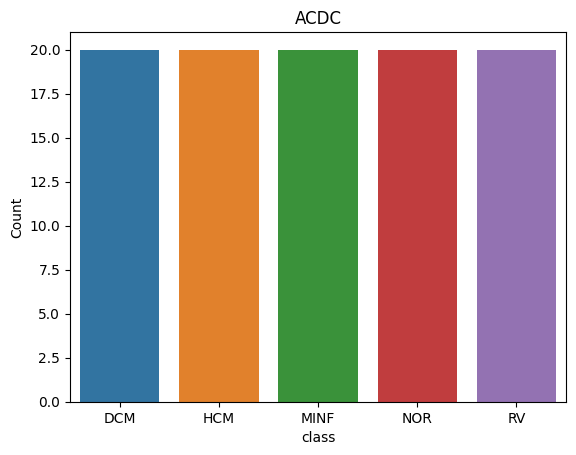

In [12]:
#classes bar plot (Balanced number of classes)
ax= sns.countplot(x=data['class'])
ax.set_xlabel("class")
ax.set_ylabel("Count")
ax.set_xticklabels(data['class'].unique()) #We could change manually x category labels
ax.set_title("ACDC")
plt.show()

This dataset is perfectly balanced.

### Calculate statistic by feature

In [29]:
stats = data.describe().T[['mean', 'std']]

stats.head()

,mean,std
original_shape_Elongation_LV_ED,0.559329,0.086312
original_shape_Flatness_LV_ED,0.116327,0.044954
original_shape_LeastAxisLength_LV_ED,7.027303,2.421983
original_shape_MajorAxisLength_LV_ED,61.907922,11.241951
original_shape_Maximum2DDiameterColumn_LV_ED,48.331549,11.736217


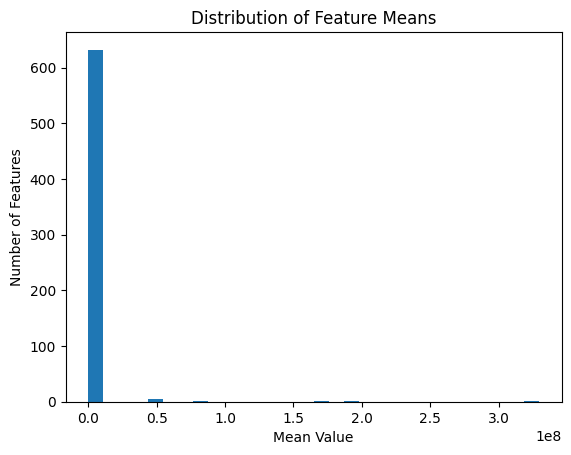

In [30]:
plt.hist(stats['mean'], bins=30)
plt.title('Distribution of Feature Means')
plt.xlabel('Mean Value')
plt.ylabel('Number of Features')
plt.show()

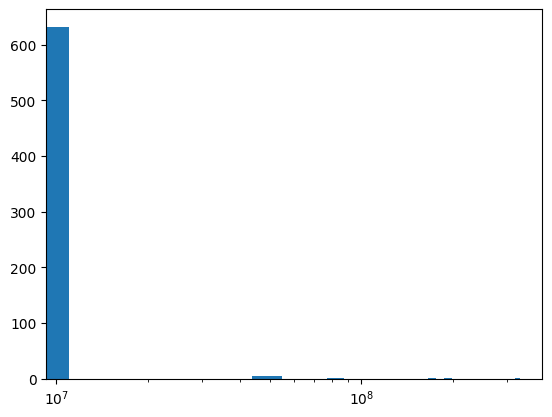

In [34]:
plt.hist(stats['mean'], bins=30)
plt.xscale('log')

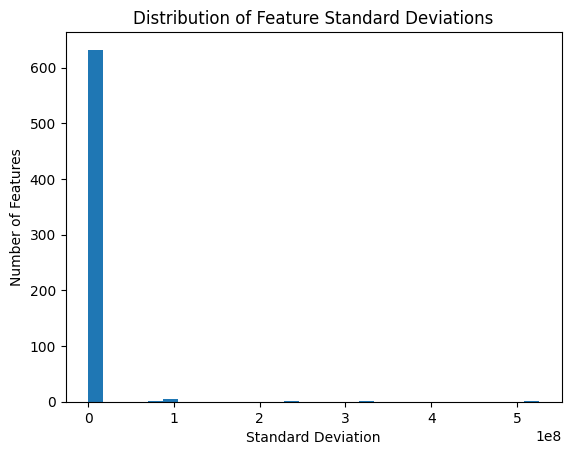

In [31]:
plt.hist(stats['std'], bins=30)
plt.title('Distribution of Feature Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Number of Features')
plt.show()

### Correlation matrix

In [14]:
# Filter only numeric columns, this excluide the class
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

print(corr_matrix)

                                              original_shape_Elongation_LV_ED  \
original_shape_Elongation_LV_ED                                      1.000000   
original_shape_Flatness_LV_ED                                        0.351363   
original_shape_LeastAxisLength_LV_ED                                 0.171077   
original_shape_MajorAxisLength_LV_ED                                -0.367430   
original_shape_Maximum2DDiameterColumn_LV_ED                         0.138632   
...                                                                       ...   
original_ngtdm_Complexity_MYO_ES                                    -0.052940   
original_ngtdm_Contrast_MYO_ES                                       0.115934   
original_ngtdm_Strength_MYO_ES                                      -0.082473   
height                                                               0.066956   
weight                                                               0.181517   

                           

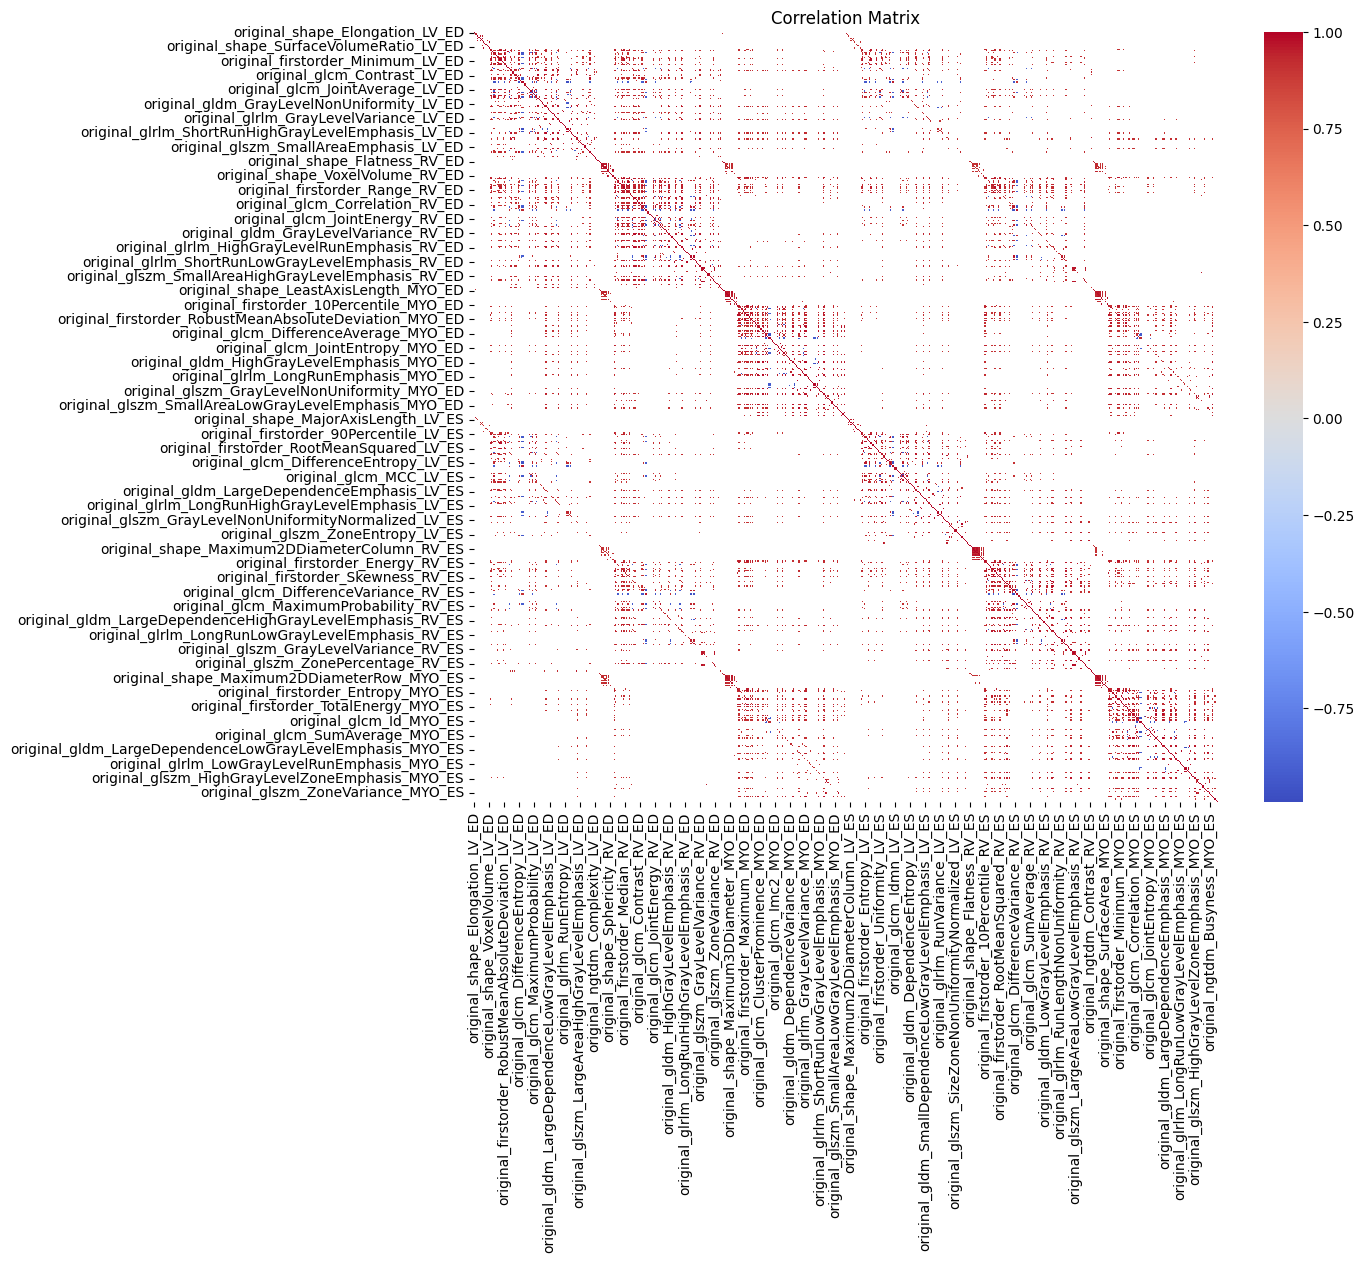

In [15]:
# Select only features with high correlation (>0.9)
threshold = 0.9

# Create a mask
mask = np.abs(corr_matrix) < threshold

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0, annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### PCA

In [16]:
# Select only numerical features (excluding categorical ones like labels or IDs)
y = data["class"]
X = data.select_dtypes(include=[np.number])

# Standardize the data (zero mean and unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original data dimensions: {X.shape}")

Original data dimensions: (100, 644)


Explained variance by PC1 and PC2: [0.45013608 0.1164318 ]


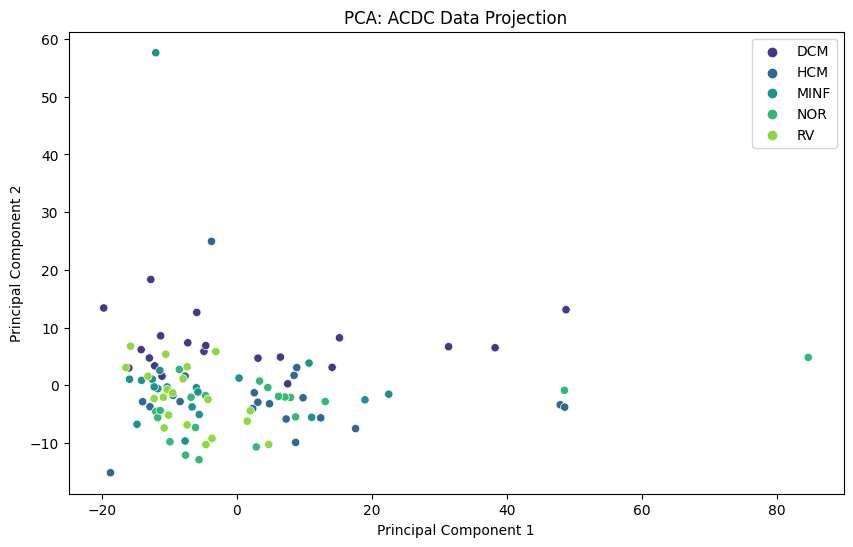

In [17]:
# Initialize PCA with 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance by the first two principal components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_variance}")

# Convert PCA-transformed data into a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = y.values # Adjust the class column name if different

 # Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="class", palette="viridis", data=df_pca)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: ACDC Data Projection")
plt.legend()
plt.show()

With two principal components, the groups are not well separated, and the classes appear mixed. Additionally, the explained variance is only 55%, which is relatively low. 

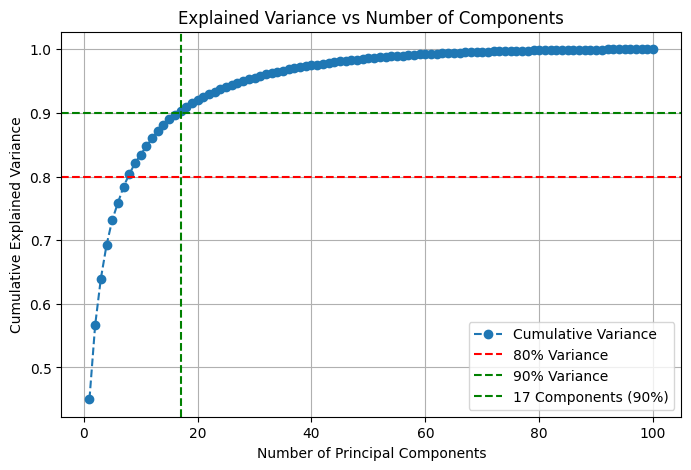

In [18]:
# Fit PCA with all components
pca = PCA().fit(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components needed for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="--", label="Cumulative Variance")

# Add reference lines for 80% and 90%
plt.axhline(y=0.80, color="r", linestyle="--", label="80% Variance")
plt.axhline(y=0.90, color="g", linestyle="--", label="90% Variance")
plt.axvline(x=n_components_90, color="g", linestyle="--", label=f"{n_components_90} Components (90%)")

# Labels and legend
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Apply PCA with 12 components
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

# Show the new explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by 12 components: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance):.2f}")

Explained variance by 12 components: [0.45013608 0.1164318  0.07303252 0.05279159 0.03934504 0.02700238
 0.02556018 0.01950999 0.01712034 0.01342004 0.01331607 0.01256307]
Total variance explained: 0.86


In [20]:
# Apply PCA with 16 components
pca = PCA(n_components=16)
X_pca_16 = pca.fit_transform(X_scaled)

# Show the new explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by 16 components: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance):.2f}")

Explained variance by 16 components: [0.45013608 0.1164318  0.07303252 0.05279159 0.03934504 0.02700238
 0.02556019 0.01951001 0.01712035 0.01342007 0.0133172  0.01256349
 0.01086218 0.00983554 0.00871506 0.00722734]
Total variance explained: 0.90


In [21]:
# Save X_pca with 16 principal components
np.save("../datasets/X_pca_16.npy", X_pca_16)

# Save the y in the original format
y.to_csv("../datasets/y_original.csv", index=False)

# Encoding and save the y
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y.values)

np.save("../datasets/y_enc.npy", y_enc)

By increasing the number of principal components, we observe that with 12 components, we achieve 86% explained variance, and with 16, we reach 90%. While this improves data representation for modeling, it does not necessarily enhance visualization, as higher-dimensional spaces are harder to interpret.